In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
#loading the time series data
data = pd.read_csv('train_egg_sales.csv', sep = ';')

In [236]:
data.head()

,Date,Egg Sales
0,1993-01-01,91.0
1,1993-01-02,124.0
2,1993-01-03,112.0
3,1993-01-04,115.0
4,1993-01-05,107.0


In [207]:
data['Date'] = pd.to_datetime(data['Date'])

In [208]:
data.index = data['Date'] #In a univariant model, Data Time model should be saved as Index
data.head()

,Date,Egg Sales
Date,,
1993-01-01,1993-01-01,91.0
1993-01-02,1993-01-02,124.0
1993-01-03,1993-01-03,112.0
1993-01-04,1993-01-04,115.0
1993-01-05,1993-01-05,107.0


In [209]:
del data['Date']
data

,Egg Sales
Date,
1993-01-01,91.0
1993-01-02,124.0
1993-01-03,112.0
1993-01-04,115.0
1993-01-05,107.0
...,...
2021-12-27,681.0
2021-12-28,664.0
2021-12-29,613.0


In [210]:
data = data.reset_index()

In [211]:
data

,Date,Egg Sales
0,1993-01-01,91.0
1,1993-01-02,124.0
2,1993-01-03,112.0
3,1993-01-04,115.0
4,1993-01-05,107.0
...,...,...
10587,2021-12-27,681.0
10588,2021-12-28,664.0
10589,2021-12-29,613.0
10590,2021-12-30,643.0


In [212]:
from prophet import Prophet
#!pip list

In [213]:
data.columns = ['ds', 'y']

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      10592 non-null  datetime64[ns]
 1   y       10592 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 165.6 KB


In [215]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3g_s897k/sb52ufre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3g_s897k/ampt1ig9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42943', 'data', 'file=/tmp/tmp3g_s897k/sb52ufre.json', 'init=/tmp/tmp3g_s897k/ampt1ig9.json', 'output', 'file=/tmp/tmp3g_s897k/prophet_modelf072kq3k/prophet_model-20231030101021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [216]:
future = m.make_future_dataframe(periods=358, freq='D')
future.tail(20)

,ds
10930,2022-12-05
10931,2022-12-06
10932,2022-12-07
10933,2022-12-08
10934,2022-12-09
10935,2022-12-10
10936,2022-12-11
10937,2022-12-12
10938,2022-12-13
10939,2022-12-14


In [217]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1993-01-01,114.411198,87.977188,143.218552
1,1993-01-02,111.630443,85.009415,138.723007
2,1993-01-03,109.197113,80.963521,136.466800
3,1993-01-04,107.202145,81.445115,134.166928
4,1993-01-05,104.631767,78.806220,132.362593
...,...,...,...,...
10945,2022-12-20,694.253917,667.258227,720.410274
10946,2022-12-21,692.080152,665.279995,721.766268
10947,2022-12-22,691.414388,663.630666,719.503554
10948,2022-12-23,689.143129,663.957272,715.960676


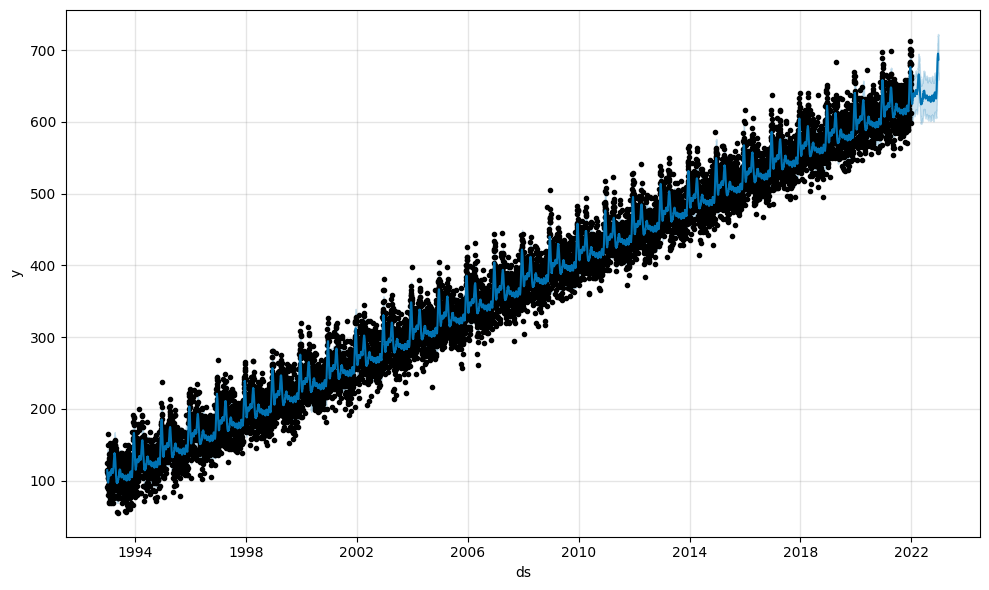

In [218]:
future_price = m.plot(forecast)
plt.savefig('Future Price(31 Day fill)')

In [219]:
forecast['yhat'].head()

0    114.411198
1    111.630443
2    109.197113
3    107.202145
4    104.631767
Name: yhat, dtype: float64

In [220]:
forecast[['ds','yhat']].tail(25)

,ds,yhat
10925,2022-11-30,644.335896
10926,2022-12-01,648.097130
10927,2022-12-02,650.898329
10928,2022-12-03,654.472118
10929,2022-12-04,658.351124
10930,2022-12-05,662.536391
10931,2022-12-06,665.926905
10932,2022-12-07,668.541080
10933,2022-12-08,673.032243
10934,2022-12-09,676.194981


In [221]:
final_forecast = forecast[['ds','yhat']].tail(358)

In [222]:
final_forecast

,ds,yhat
10592,2022-01-01,643.599306
10593,2022-01-02,640.916216
10594,2022-01-03,638.621728
10595,2022-01-04,635.710327
10596,2022-01-05,632.292292
...,...,...
10945,2022-12-20,694.253917
10946,2022-12-21,692.080152
10947,2022-12-22,691.414388
10948,2022-12-23,689.143129


In [223]:
final_forecast.columns = ['Date', 'Egg Sales Prediction']

In [231]:
final_forecast

,Date,Egg Sales Prediction
0,2022-01-01,643.599306
1,2022-01-02,640.916216
2,2022-01-03,638.621728
3,2022-01-04,635.710327
4,2022-01-05,632.292292
...,...,...
353,2022-12-20,694.253917
354,2022-12-21,692.080152
355,2022-12-22,691.414388
356,2022-12-23,689.143129


In [230]:
#final_forecast = final_forecast.reset_index() #First
del final_forecast['index']  #Second

In [226]:
#final_forecast.to_csv('submission.csv', index=False)

In [232]:
submission = final_forecast
submission.columns = ['ID','Expected']

In [233]:
submission

,ID,Expected
0,2022-01-01,643.599306
1,2022-01-02,640.916216
2,2022-01-03,638.621728
3,2022-01-04,635.710327
4,2022-01-05,632.292292
...,...,...
353,2022-12-20,694.253917
354,2022-12-21,692.080152
355,2022-12-22,691.414388
356,2022-12-23,689.143129


In [234]:
submission.to_csv('submission.csv', index=False)